in getWeeklyExcelSummary


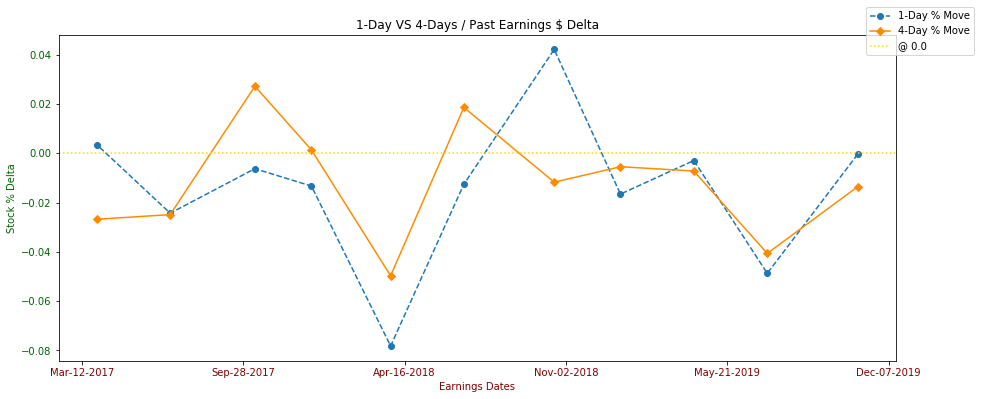

In [9]:
# import sys
# sys.path.append("/home/michael/pycharm/pycharm-2019.2.3/debug-eggs/pydevd-pycharm.egg")
# 
# import pydevd_pycharm
# pydevd_pycharm.settrace('192.168.1.200', port=2222, stdoutToServer=True, stderrToServer=True)

import sys
sys.path.append('/home/michael/jupyter/local-packages')

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

import numpy as np
import pandas as pd

from plotEarnings import getEarningsData 

# Starting Monday of earnings week
startday = '2020-01-06'

#Get weekly earnings
theEarningsDataList =  getEarningsData.getWeeklyExcelSummary(startday, 'LNN')

earnings1DayMove_np = theEarningsDataList[0]
earnings4DayMove_np = theEarningsDataList[1]
earningsMdate_np = theEarningsDataList[2]
earnings1DayCandlestick  = theEarningsDataList[3]


#=============================================================================================
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
formatter.formats = ["%b-%d-%Y"]

color1DayStockMove = 'tab:blue'
color4DayStockMove = 'darkorange'
xLabel = 'Earnings Dates'
xLabelColor = 'maroon'
yLabelColor =  'darkgreen'
yLabel1DayStockMove = 'Stock % Delta @ 1 Day Close Price'
yLabel4DayStockMove = 'Stock % Delta @ 4 Day Close Price'
yLabel =  'Stock % Delta'
ax1LegendLabel1Day = "1-Day % Move"
ax1LegendLabel4Day = "4-Day % Move"
zeroPointLabel = '@ 0.0'

# single Plot
# theStock = excelPastEarningsDateDF.iloc[0,0]
fig, ax1 = plt.subplots(figsize=(15,6))

    
ax1.set_title('1-Day VS 4-Days / Past Earnings $ Delta')


ax1.set_xlabel(xLabel, color=xLabelColor)
ax1.set_ylabel(yLabel, color=yLabelColor)
ax1.tick_params(axis='y', labelcolor=yLabelColor)
ax1.tick_params(axis='x', labelcolor=xLabelColor)

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%d-%Y"))

ax1.plot(earningsMdate_np, earnings1DayMove_np, color=color1DayStockMove, 
         label=ax1LegendLabel1Day,  linestyle='--', marker='o' )
ax1.plot(earningsMdate_np, earnings4DayMove_np, color=color4DayStockMove, 
         label=ax1LegendLabel4Day,  linestyle='-', marker='D' )
plt.axhline(y=0,color='gold',linestyle=':', label=zeroPointLabel)

#build Legend for 2 Xaxis
lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1.1, 1.1))

# fig.autofmt_xdate()
# plt.show()